In [102]:
import pandas as pd
import numpy as np

In [103]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [104]:
%matplotlib inline
plt.style.use('ggplot') 

In [105]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [106]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)

In [107]:
# Get length of stay from the icustays table
query = \
"""
select diagnosis, count(distinct(charttime)) as lab_time_count, count(distinct(l.subject_id)) as subject_count
    from mimiciii.labevents l inner join
    mimiciii.admissions a on
    a.subject_id=l.subject_id
    where admission_type not like 'NEWBORN'
    group by diagnosis
    order by lab_time_count desc
    limit 20
"""

data = pd.read_sql_query(query,con)

In [108]:
# Display the first few rows of the data
data.head(150)

,diagnosis,lab_time_count,subject_count
0,SEPSIS,121765,1096
1,PNEUMONIA,121197,1419
2,CONGESTIVE HEART FAILURE,90914,811
3,FEVER,70097,478
4,ABDOMINAL PAIN,56184,531
5,ALTERED MENTAL STATUS,52013,677
6,CHEST PAIN,51689,747
7,GASTROINTESTINAL BLEED,50178,662
8,CORONARY ARTERY DISEASE,42585,839
9,HYPOTENSION,42506,393


In [109]:
#data['lab_time_count'].quantile([.1, .25, .5, .75, .9])

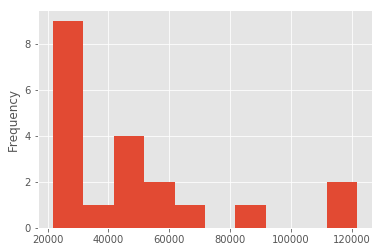

In [110]:
data.lab_time_count.plot(kind='hist')

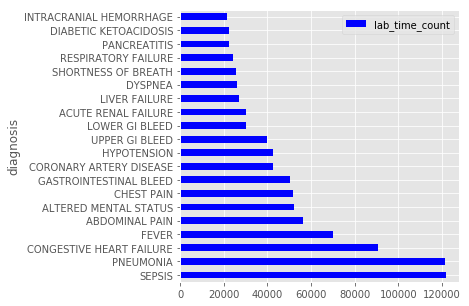

In [111]:
diagnoses = data.set_index('diagnosis').plot.barh(y='lab_time_count', figsize=(5, 5), color='blue')

In [112]:
data['avg_lab_time_count'] = data['lab_time_count'] / data['subject_count']
data.head(100)

,diagnosis,lab_time_count,subject_count,avg_lab_time_count
0,SEPSIS,121765,1096,111.099453
1,PNEUMONIA,121197,1419,85.410148
2,CONGESTIVE HEART FAILURE,90914,811,112.101110
3,FEVER,70097,478,146.646444
4,ABDOMINAL PAIN,56184,531,105.807910
5,ALTERED MENTAL STATUS,52013,677,76.828656
6,CHEST PAIN,51689,747,69.195448
7,GASTROINTESTINAL BLEED,50178,662,75.797583
8,CORONARY ARTERY DISEASE,42585,839,50.756853
9,HYPOTENSION,42506,393,108.157761


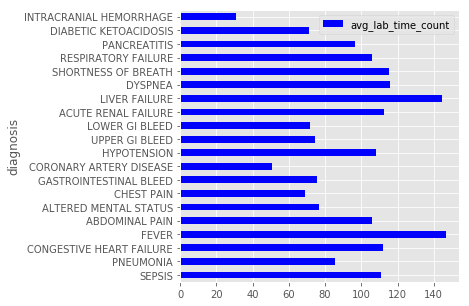

In [113]:
diagnoses = data.set_index('diagnosis').plot.barh(y='avg_lab_time_count', figsize=(5, 5), color='blue')

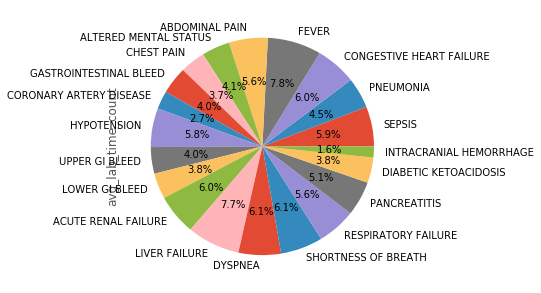

In [114]:
plot = data.plot.pie(y='avg_lab_time_count', figsize=(5, 5), legend=False, labels=data.diagnosis, autopct='%1.1f%%')

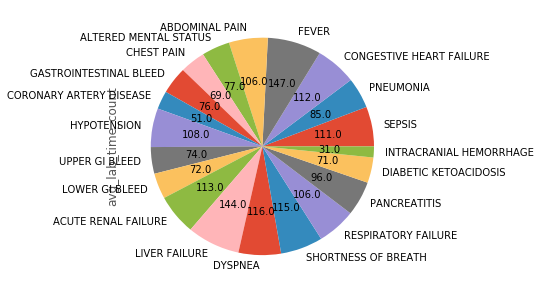

In [115]:
sizes = np.array(data.avg_lab_time_count)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plot = data.plot.pie(y='avg_lab_time_count', figsize=(5, 5), legend=False, labels=data.diagnosis, autopct=absolute_value)